In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
gdp_df = pd.read_csv(r"C:/Users/j0909/Desktop/NSS/un_exploration-jrawdata/data/gdp_per_capita.csv", engine='python', skipfooter=2)

In [57]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
...,...,...,...,...
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN


In [62]:
gdp_df1 = gdp_df.drop(columns=['Value Footnotes'])


In [67]:
gdp_df1= gdp_df1.set_axis(["Country","Year","GDP_Per_Capita"], axis = 1)

In [73]:
gdp_df1


,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


In [71]:
print(gdp_df1.dtypes)

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


In [98]:
freq = gdp_df1.value_counts('Year')

In [99]:
freq

Year
2017    238
2016    238
2015    238
2014    238
2013    238
2011    237
2018    237
2012    237
2009    236
2010    236
2006    235
2007    235
2008    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
dtype: int64

In [100]:
gdp_df1.Year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [101]:
countfreq = gdp_df1.value_counts('Country')

In [102]:
countfreq

Country
Lebanon                      30
Middle income                30
Morocco                      30
Mozambique                   30
Myanmar                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Length: 238, dtype: int64

In [103]:
gdp_df1.Country.unique()

array(['Zimbabwe', 'Luxembourg', 'Sub-Saharan Africa', 'Bermuda',
       'OECD members', 'Eswatini', 'Central African Republic',
       'Sub-Saharan Africa (excluding high income)', 'Argentina',
       'Czech Republic', 'Nepal', 'Comoros', 'Ireland', 'Lao PDR',
       'United Arab Emirates', 'Poland', 'Benin', 'Lower middle income',
       'Sub-Saharan Africa (IDA & IBRD)', 'Mongolia', 'Sudan',
       'Late-demographic dividend', 'Fiji', 'Ethiopia', 'Dominica',
       'Low income', 'Belize', 'Armenia', 'Uganda', 'Ukraine',
       'Central Europe and the Baltics', 'Portugal', 'IDA & IBRD total',
       'Spain', 'Grenada', 'Equatorial Guinea', 'Antigua and Barbuda',
       'Malawi', 'Netherlands', 'Sri Lanka', 'Hong Kong SAR, China',
       'Caribbean small states', 'United States', 'St. Kitts and Nevis',
       'Haiti', 'Norway', 'Finland', 'Congo', 'Bolivia',
       'Pre-demographic dividend', 'Kyrgyz Republic', 'Madagascar',
       'St. Lucia', 'Post-demographic dividend', 'Bhutan', '

In [104]:
gdp_df1.nunique()

Country            238
Year                30
GDP_Per_Capita    6809
dtype: int64

In [115]:
gdp_2014 = gdp_df1[gdp_df1["Year"] == 2014]

In [116]:
print (gdp_2014)

                         Country  Year  GDP_Per_Capita
4074  Middle East & North Africa  2014    15909.423528
3631                  Low income  2014     2246.755256
6457                      Uganda  2014     2022.260962
4408                       Nepal  2014     2829.233394
5218                      Rwanda  2014     1780.144013
...                          ...   ...             ...
1482                    Djibouti  2014     4238.996239
3555                       Libya  2014    12201.208520
1392              Czech Republic  2014    34496.508048
6009                      Sweden  2014    49416.289877
2595                   IBRD only  2014    11333.512094

[238 rows x 3 columns]


In [122]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


In [124]:
list(gdp_2014.columns.values)

['Country', 'Year', 'GDP_Per_Capita']

In [141]:
gdp_2014['GDP_Per_Capita'].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

(array([[238.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [238.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [139.,  48.,  24.,  19.,   4.,   1.,   2.,   0.,   0.,   1.]]),
 array([0.0, 15651.413384978401, 31302.826769956802, 46954.24015493521,
        62605.653539913605, 78257.066924892, 93908.48030987041,
        109559.89369484881, 125211.30707982721, 140862.7204648056,
        156514.133849784], dtype=object),
 <a list of 3 BarContainer objects>)

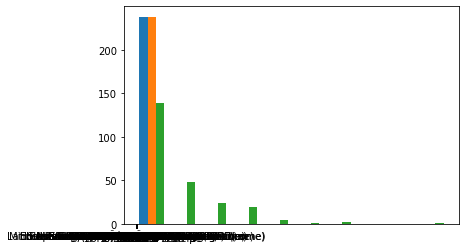

In [142]:
plt.hist(gdp_2014)

(array([[238.,   0.,   0.,   0.,   0.],
        [238.,   0.,   0.,   0.,   0.],
        [187.,  43.,   5.,   2.,   1.]]),
 array([0.0, 31302.826769956802, 62605.653539913605, 93908.48030987041,
        125211.30707982721, 156514.133849784], dtype=object),
 <a list of 3 BarContainer objects>)

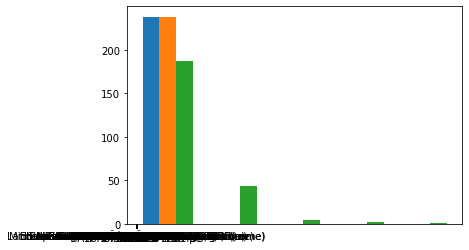

In [146]:
plt.hist(gdp_2014, bins=5)

In [148]:
gdp_2014.sort_values("GDP_Per_Capita")

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541
...,...,...,...
561,Bermuda,2014,77361.104881
5464,Singapore,2014,87808.663157
5138,Qatar,2014,95578.416973
3691,Luxembourg,2014,108760.916030


In [169]:
gdp_pivoted = gdp_df1.pivot_table(values='GDP_Per_Capita',
                                  index=['Year'],
                                  columns="Country")

In [150]:
gdp_pivoted

,GDP_Per_Capita,Year
Country,,
Afghanistan,1742.819999,2010.5
Albania,8123.257555,2004.5
Algeria,9895.309875,2004.5
Angola,6154.445615,2004.5
Antigua and Barbuda,18359.694307,2004.5
...,...,...
Vietnam,4148.415659,2004.5
West Bank and Gaza,5054.203023,2006.5
World,12580.133331,2004.5


In [182]:
gdp_df1[gdp_df1['Year'].isin([1990,2017])]

,Country,Year,GDP_Per_Capita
6867,Zimbabwe,1990,3324.348171
3715,Luxembourg,1990,67857.540495
5883,Sub-Saharan Africa,1990,2838.374656
585,Bermuda,1990,65961.406278
4702,OECD members,1990,29442.103553
...,...,...,...
3922,Marshall Islands,2017,3775.524973
588,Bhutan,2017,11142.399948
1756,Equatorial Guinea,2017,22551.083246
1030,Cayman Islands,2017,69572.496853


In [220]:
gdp_pivoted = pd.pivot_table(gdp_df1[gdp_df1['Year'].isin([1990,2017])], values = 'GDP_Per_Capita' ,index=['Country'], columns=['Year'])
        

In [221]:
gdp_pivoted

Year,1990,2017
Country,,
Afghanistan,NaN,2058.383832
Albania,4842.734635,12811.759436
Algeria,8746.352901,11737.409353
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551675,19840.076123
...,...,...
Vietnam,1673.249634,7155.745829
West Bank and Gaza,NaN,6401.740891
World,9680.269697,16253.385518


In [244]:
gdp_pivoted.dropna(inplace = True)

In [245]:
gdp_pivoted['Percent_change'] = 100 * ((gdp_pivoted[2017] - gdp_pivoted[1990])/gdp_pivoted[1990])

In [246]:
gdp_pivoted.sort_values('Percent_change', ascending = False)

Year,1990,2017,Percent_change
Country,,,
Equatorial Guinea,1039.985049,22551.083246,2068.404561
China,1423.896348,14344.421239,907.406281
Myanmar,619.645144,4739.910118,664.939443
East Asia & Pacific (excluding high income),2173.223895,12986.322227,497.560254
East Asia & Pacific (IDA & IBRD),2196.950288,13123.151792,497.334945
...,...,...,...
Central African Republic,1201.677234,912.802052,-24.039332
Ukraine,15751.722440,11871.123624,-24.636028
Burundi,1184.842440,773.571858,-34.710993


In [231]:
gdp_pivoted_neg = gdp_pivoted[gdp_pivoted['Percent_change'] < 0]

In [247]:
num_rows = gdp_pivoted_neg.shape[0]


In [248]:
print(num_rows)

17


In [254]:
gdp_EG = gdp_df1[gdp_df1['Country'].isin(['Equatorial Guinea'])]

In [255]:
gdp_EG

,Country,Year,GDP_Per_Capita
1783,Equatorial Guinea,1990,1039.985049
1782,Equatorial Guinea,1991,996.857617
1781,Equatorial Guinea,1992,1299.934196
1780,Equatorial Guinea,1993,1395.403468
1779,Equatorial Guinea,1994,1572.065607
1778,Equatorial Guinea,1995,1781.264878
1777,Equatorial Guinea,1996,2857.452417
1776,Equatorial Guinea,1997,6868.480369
1775,Equatorial Guinea,1998,8166.052518
1774,Equatorial Guinea,1999,9851.190917


<AxesSubplot:xlabel='Year'>

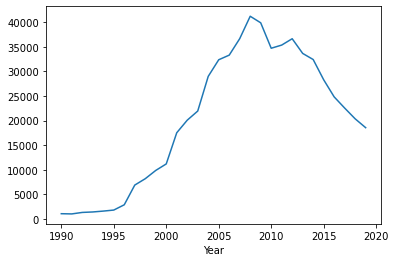

In [252]:
gdp_EG.set_index('Year')['GDP_Per_Capita'].plot()

In [256]:
gdp_China = gdp_df1[gdp_df1['Country'].isin(['China'])]

<AxesSubplot:xlabel='Year'>

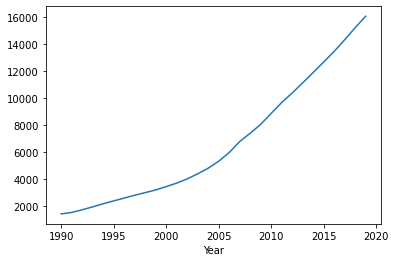

In [257]:
gdp_China.set_index('Year')['GDP_Per_Capita'].plot()

<AxesSubplot:xlabel='Year'>

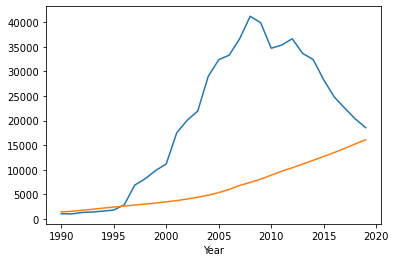

In [258]:
gdp_EG.set_index('Year')['GDP_Per_Capita'].plot()
gdp_China.set_index('Year')['GDP_Per_Capita'].plot()